In [2]:
import pandas as pd
import pandana, time, os, pandas as pd, numpy as np
from pandana.loaders import osm
from shapely.geometry import Polygon

In [3]:
import geopandas
import geojson 

polygons_df = geopandas.read_file(f'denmark_pop_100m.json')

polygons_df

data                   geometry
0       1.206668  POINT (10.60083 57.74333)
1       0.982903  POINT (10.60167 57.74333)
2       0.970523  POINT (10.63333 57.74333)
3       1.223284  POINT (10.63083 57.74083)
4       1.048370  POINT (10.59583 57.74000)
...          ...                        ...
846588  0.870005  POINT (11.94083 54.56917)
846589  0.815470  POINT (11.95167 54.56917)
846590  0.536970  POINT (11.97250 54.56833)
846591  0.565375  POINT (11.95167 54.56583)
846592  0.631354  POINT (11.97250 54.56417)

[846593 rows x 2 columns]

In [4]:
poly_metadata_df = geopandas.read_file(f'dk_polygons_100m.json')

poly_metadata_df

population_density      id  \
0                 1.206668       0   
1                 0.982903       1   
2                 0.970523       2   
3                 1.223284       3   
4                 1.048370       4   
...                    ...     ...   
846588            0.870005  846588   
846589            0.815470  846589   
846590            0.536970  846590   
846591            0.565375  846591   
846592            0.631354  846592   

                                                 geometry  
0       POLYGON ((10.60042 57.74292, 10.60125 57.74292...  
1       POLYGON ((10.60125 57.74292, 10.60208 57.74292...  
2       POLYGON ((10.63292 57.74292, 10.63375 57.74292...  
3       POLYGON ((10.63042 57.74042, 10.63125 57.74042...  
4       POLYGON ((10.59542 57.73958, 10.59625 57.73958...  
...                                                   ...  
846588  POLYGON ((11.94042 54.56875, 11.94125 54.56875...  
846589  POLYGON ((11.95125 54.56875, 11.95208 54.56875...  
846590  POLYGON ((11.97208 54.56792, 11.97292 54.56792...  
846591  POLYGON ((11.95125 54.56542, 11.95208 54.56542...  
846592  POLYGON ((11.97208 54.56375, 11.97292 54.56375...  

[846593 rows x 3 columns]

In [5]:
gdf = poly_metadata_df[["population_density", "id", "geometry"]]

gdf["lon"] = polygons_df.geometry.x
gdf["lat"] = polygons_df.geometry.y

gdf

population_density      id  \
0                 1.206668       0   
1                 0.982903       1   
2                 0.970523       2   
3                 1.223284       3   
4                 1.048370       4   
...                    ...     ...   
846588            0.870005  846588   
846589            0.815470  846589   
846590            0.536970  846590   
846591            0.565375  846591   
846592            0.631354  846592   

                                                 geometry        lon  \
0       POLYGON ((10.60042 57.74292, 10.60125 57.74292...  10.600833   
1       POLYGON ((10.60125 57.74292, 10.60208 57.74292...  10.601667   
2       POLYGON ((10.63292 57.74292, 10.63375 57.74292...  10.633333   
3       POLYGON ((10.63042 57.74042, 10.63125 57.74042...  10.630833   
4       POLYGON ((10.59542 57.73958, 10.59625 57.73958...  10.595833   
...                                                   ...        ...   
846588  POLYGON ((11.94042 54.56875, 11.94125 54.56875...  11.940833   
846589  POLYGON ((11.95125 54.56875, 11.95208 54.56875...  11.951667   
846590  POLYGON ((11.97208 54.56792, 11.97292 54.56792...  11.972500   
846591  POLYGON ((11.95125 54.56542, 11.95208 54.56542...  11.951667   
846592  POLYGON ((11.97208 54.56375, 11.97292 54.56375...  11.972500   

              lat  
0       57.743333  
1       57.743333  
2       57.743333  
3       57.740833  
4       57.740000  
...           ...  
846588  54.569167  
846589  54.569167  
846590  54.568333  
846591  54.565833  
846592  54.564167  

[846593 rows x 5 columns]

In [149]:
import shapely

poly_metadata_df = pd.read_csv(f'dk_polygons_100m.json')


#poly_metadata_df["geometry"] = poly_metadata_df["center"].apply(lambda row: shapely.wkt.loads(row))
poly_metadata_df["geometry"] = poly_metadata_df["geometry"].apply(lambda row: shapely.wkt.loads(row))
gdf = geopandas.GeoDataFrame(poly_metadata_df[["population_density", "id", "geometry"]], geometry="geometry")
#gdf

gdf["lon"] = polygons_df.geometry.x
gdf["lat"] = polygons_df.geometry.y
gdf

ParserError: Error tokenizing data. C error: Expected 2 fields in line 3, saw 3


In [6]:
margin = 0.000000000001
bbox_min_lon = polygons_df.geometry.x.min() - margin
bbox_max_lon = polygons_df.geometry.x.max() + margin

bbox_min_lat = polygons_df.geometry.y.min() - margin
bbox_max_lat = polygons_df.geometry.y.max() + margin


# doing it specifically for copenhagen here

bbox_min_lon = 12.3080 
bbox_max_lon = 12.7096

bbox_min_lat = 55.5416
bbox_max_lat = 55.7761

In [7]:
dk_bbox = [bbox_min_lon, bbox_min_lat, bbox_max_lon, bbox_max_lat]

dk_bbox

[12.308, 55.5416, 12.7096, 55.7761]

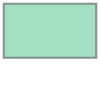

In [8]:
dk_bbox_polygon = Polygon([
                        [bbox_min_lon, bbox_min_lat],
                        [bbox_min_lon, bbox_max_lat],
                        [bbox_max_lon, bbox_max_lat],
                        [bbox_max_lon, bbox_min_lat],
                        [bbox_min_lon, bbox_min_lat]
                    ])
dk_bbox_polygon

In [154]:

temp_df =  polygons_df[polygons_df.geometry.within(dk_bbox_polygon)]

temp_df

data                   geometry
404553  7.462789  POINT (12.31750 55.77583)
404554  7.519377  POINT (12.31833 55.77583)
404555  7.477559  POINT (12.31917 55.77583)
404556  8.174482  POINT (12.32000 55.77583)
404557  8.472622  POINT (12.32083 55.77583)
...          ...                        ...
556543  1.806146  POINT (12.59667 55.55750)
556872  2.767010  POINT (12.58583 55.55667)
556873  2.241621  POINT (12.58667 55.55667)
556874  2.739544  POINT (12.58833 55.55667)
556875  1.825089  POINT (12.59500 55.55667)

[60145 rows x 2 columns]

In [155]:
temp_df["lon"] = temp_df.geometry.x
temp_df["lat"] = temp_df.geometry.y

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
import plotly.express as px
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        temp_df, 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
       #size="population_density",
        #color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': bbox_min_lon + bbox_max_lon - bbox_min_lon, 'lat':  bbox_min_lat + bbox_max_lat - bbox_min_lat},
        'zoom': 4, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "Polygon",
                        'coordinates': [[
                            [bbox_min_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_min_lat],
                        ]]
                    }
                }]
            },
            'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})

## Iterate over the entire bbox of denmark by creating smaller bounding box

In [18]:
curr_bbox = dk_bbox_polygon

In [23]:
import numpy as np

max_width = 0.1
max_height = 0.1

acc = []
for lon in np.arange(curr_bbox[0], curr_bbox[2], max_width): 
    if curr_bbox:
        print(f'{curr_bbox}')#, acc: {acc}')
    for lat in np.arange(curr_bbox[1], curr_bbox[3], max_height):
        curr_bbox = [lon, lat, lon+max_width, lat+max_height]
        bbox_polygon = Polygon([
                        [lon, lat],
                        [lon, lat+max_height],
                        [lon+max_width, lat+max_height],
                        [lon+max_width, lat],
                        [lon, lat]
                    ])
        polys = polygons_df[polygons_df.within(bbox_polygon)]
        if len(polys.index) > 0:
            acc = acc + polys.index.tolist()



[10.899999999999997, 56.2, 10.999999999999996, 56.300000000000004]


In [24]:
polygons_df.iloc[acc, :]

data                   geometry        lon        lat
27292   92.629158  POINT (10.90292 56.39542)  10.902917  56.395417
27293  271.847809  POINT (10.91125 56.39542)  10.911250  56.395417
27294  139.763458  POINT (10.91958 56.39542)  10.919583  56.395417
27624   49.781826  POINT (10.90292 56.38708)  10.902917  56.387083
27625   79.396133  POINT (10.91125 56.38708)  10.911250  56.387083
27626   17.520403  POINT (10.91958 56.38708)  10.919583  56.387083
27955   14.642076  POINT (10.90292 56.37875)  10.902917  56.378750
27956   20.986614  POINT (10.91125 56.37875)  10.911250  56.378750
28285    3.547470  POINT (10.90292 56.37042)  10.902917  56.370417
28286    6.597677  POINT (10.91125 56.37042)  10.911250  56.370417
28612    2.891848  POINT (10.90292 56.36208)  10.902917  56.362083
28613    4.572790  POINT (10.91125 56.36208)  10.911250  56.362083
28937    2.837297  POINT (10.90292 56.35375)  10.902917  56.353750
28938    6.325330  POINT (10.91125 56.35375)  10.911250  56.353750
29264    2.812807  POINT (10.90292 56.34542)  10.902917  56.345417
29265    7.146904  POINT (10.91125 56.34542)  10.911250  56.345417
29591    5.026046  POINT (10.90292 56.33708)  10.902917  56.337083
29592    1.812350  POINT (10.91125 56.33708)  10.911250  56.337083
29923    0.707110  POINT (10.90292 56.32875)  10.902917  56.328750

In [25]:
px.set_mapbox_access_token(open(".mapbox_token").read())

polygons_df["lon"] = polygons_df.geometry.x
polygons_df["lat"] = polygons_df.geometry.y

fig = px.scatter_mapbox(
        polygons_df.iloc[acc, :], 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
       #size="population_density",
        #color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.show()


In [9]:
import importlib, sys
from PandanaHandler import getAccessibilityMeasures
importlib.reload(sys.modules['PandanaHandler'])
from PandanaHandler import getAccessibilityMeasures


import numpy as np

max_width = 0.1
max_height = 0.1

acc_df = pd.DataFrame({})
for lon in np.arange(bbox_min_lon, bbox_max_lon, max_width):
    for lat in np.arange(bbox_min_lat, bbox_max_lat, max_height):
        curr_bbox = [lat, lon, lat+max_height, lon+max_width]
        bbox_polygon = Polygon([
                        [lon, lat],
                        [lon, lat+max_height],
                        [lon+max_width, lat+max_height],
                        [lon+max_width, lat],
                        [lon, lat]
                    ])
        print(bbox_polygon)
        polys = polygons_df[polygons_df.within(bbox_polygon)]
        if len(polys.index) > 0:
            #acc = acc + polys.index.tolist()
            print(curr_bbox)
            try:
                temp_df = getAccessibilityMeasures(bbox = curr_bbox)
                acc_df = acc_df.append(temp_df)
            except Exception as e:
                print(f'{e}')

POLYGON ((12.308 55.5416, 12.308 55.6416, 12.408 55.6416, 12.408 55.5416, 12.308 55.5416))
[55.6036813, 12.5202081, 55.6942218, 12.6150132]
[55.5416, 12.308, 55.641600000000004, 12.408]
[55.5416, 12.308, 55.641600000000004, 12.408]
35 POIs loaded from CSV in 0.01 seconds
Network with 8,160 nodes loaded from HDF5 in 1.01 secs
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
POLYGON ((12.308 55.6416, 12.308 55.74160000000001, 12.408 55.74160000000001, 12.408 55.6416, 12.308 55.6416))
[55.6036813, 12.5202081, 55.6942218, 12.6150132]
[55.641600000000004, 12.308, 55.741600000000005, 12.408]
[55.641600000000004, 12.308, 55.741600000000005, 12.408]
46 POIs loaded from CSV in 0.01 seconds

POLYGON ((12.608 55.74160000000001, 12.608 55.84160000000001, 12.708 55.84160000000001, 12.708 55.74160000000001, 12.608 55.74160000000001))
POLYGON ((12.708 55.5416, 12.708 55.6416, 12.808 55.6416, 12.808 55.5416, 12.708 55.5416))
[55.6036813, 12.5202081, 55.6942218, 12.6150132]
[55.5416, 12.707999999999998, 55.641600000000004, 12.807999999999998]
[55.5416, 12.707999999999998, 55.641600000000004, 12.807999999999998]
OSM query results contain no data.
POLYGON ((12.708 55.6416, 12.708 55.74160000000001, 12.808 55.74160000000001, 12.808 55.6416, 12.708 55.6416))
[55.6036813, 12.5202081, 55.6942218, 12.6150132]
[55.641600000000004, 12.707999999999998, 55.741600000000005, 12.807999999999998]
[55.641600000000004, 12.707999999999998, 55.741600000000005, 12.807999999999998]
2 POIs loaded from CSV in 0.01 seconds
Network with 71 nodes loaded from HDF5 in 0.04 secs
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from

In [10]:
acc_df

x          y  restaurant_distance  bar_distance  \
id                                                                    
697428      12.347575  55.597827           524.836975   1000.000000   
697430      12.357365  55.607552           944.416016    712.286011   
697433      12.376276  55.616301          1000.000000    830.390991   
697438      12.391303  55.628494           798.846985   1000.000000   
697445      12.336544  55.621936          1000.000000   1000.000000   
...               ...        ...                  ...           ...   
4445861418  12.747006  55.664862          1000.000000           NaN   
4445884568  12.741745  55.667240          1000.000000           NaN   
4445884575  12.741273  55.667273          1000.000000           NaN   
4445884576  12.741307  55.667346          1000.000000           NaN   
4445884581  12.741446  55.667333          1000.000000           NaN   

            school_distance  toilets_distance  hospital_distance  \
id                                                                 
697428               1000.0        910.924988                NaN   
697430               1000.0        969.078003                NaN   
697433               1000.0        755.312012                NaN   
697438               1000.0       1000.000000                NaN   
697445               1000.0       1000.000000                NaN   
...                     ...               ...                ...   
4445861418              NaN       1000.000000                NaN   
4445884568              NaN       1000.000000                NaN   
4445884575              NaN       1000.000000                NaN   
4445884576              NaN       1000.000000                NaN   
4445884581              NaN       1000.000000                NaN   

            college_distance  
id                            
697428                   NaN  
697430                   NaN  
697433                   NaN  
697438                   NaN  
697445                   NaN  
...                      ...  
4445861418               NaN  
4445884568               NaN  
4445884575               NaN  
4445884576               NaN  
4445884581               NaN  

[135710 rows x 8 columns]

In [11]:
acc_df.isnull().sum()

x                          0
y                          0
restaurant_distance        0
bar_distance              71
school_distance         4512
toilets_distance           0
hospital_distance      52406
college_distance       92793
dtype: int64

In [12]:
df = acc_df.fillna(1000)

In [13]:
df

x          y  restaurant_distance  bar_distance  \
id                                                                    
697428      12.347575  55.597827           524.836975   1000.000000   
697430      12.357365  55.607552           944.416016    712.286011   
697433      12.376276  55.616301          1000.000000    830.390991   
697438      12.391303  55.628494           798.846985   1000.000000   
697445      12.336544  55.621936          1000.000000   1000.000000   
...               ...        ...                  ...           ...   
4445861418  12.747006  55.664862          1000.000000   1000.000000   
4445884568  12.741745  55.667240          1000.000000   1000.000000   
4445884575  12.741273  55.667273          1000.000000   1000.000000   
4445884576  12.741307  55.667346          1000.000000   1000.000000   
4445884581  12.741446  55.667333          1000.000000   1000.000000   

            school_distance  toilets_distance  hospital_distance  \
id                                                                 
697428               1000.0        910.924988             1000.0   
697430               1000.0        969.078003             1000.0   
697433               1000.0        755.312012             1000.0   
697438               1000.0       1000.000000             1000.0   
697445               1000.0       1000.000000             1000.0   
...                     ...               ...                ...   
4445861418           1000.0       1000.000000             1000.0   
4445884568           1000.0       1000.000000             1000.0   
4445884575           1000.0       1000.000000             1000.0   
4445884576           1000.0       1000.000000             1000.0   
4445884581           1000.0       1000.000000             1000.0   

            college_distance  
id                            
697428                1000.0  
697430                1000.0  
697433                1000.0  
697438                1000.0  
697445                1000.0  
...                      ...  
4445861418            1000.0  
4445884568            1000.0  
4445884575            1000.0  
4445884576            1000.0  
4445884581            1000.0  

[135710 rows x 8 columns]

In [14]:
df.isnull().sum()

x                      0
y                      0
restaurant_distance    0
bar_distance           0
school_distance        0
toilets_distance       0
hospital_distance      0
college_distance       0
dtype: int64

In [15]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [x, y, restaurant_distance, bar_distance, school_distance, toilets_distance, hospital_distance, college_distance]
Index: []

In [61]:
fig = px.scatter_mapbox(
        df, 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="x", lat="y", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
       #size="population_density",
        #color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.show()

In [16]:
gdf = gdf[gdf.within(dk_bbox_polygon)]
gdf

population_density      id  \
404935            6.256752  404935   
404936            6.607995  404936   
404937            6.797835  404937   
404938            6.738600  404938   
404939            6.722388  404939   
...                    ...     ...   
556543            1.806146  556543   
556872            2.767010  556872   
556873            2.241621  556873   
556874            2.739544  556874   
556875            1.825089  556875   

                                                 geometry        lon  \
404935  POLYGON ((12.31542 55.77458, 12.31625 55.77458...  12.315833   
404936  POLYGON ((12.31625 55.77458, 12.31708 55.77458...  12.316667   
404937  POLYGON ((12.31875 55.77458, 12.31958 55.77458...  12.319167   
404938  POLYGON ((12.31958 55.77458, 12.32042 55.77458...  12.320000   
404939  POLYGON ((12.32042 55.77458, 12.32125 55.77458...  12.320833   
...                                                   ...        ...   
556543  POLYGON ((12.59625 55.55708, 12.59708 55.55708...  12.596667   
556872  POLYGON ((12.58542 55.55625, 12.58625 55.55625...  12.585833   
556873  POLYGON ((12.58625 55.55625, 12.58708 55.55625...  12.586667   
556874  POLYGON ((12.58792 55.55625, 12.58875 55.55625...  12.588333   
556875  POLYGON ((12.59458 55.55625, 12.59542 55.55625...  12.595000   

              lat  
404935  55.775000  
404936  55.775000  
404937  55.775000  
404938  55.775000  
404939  55.775000  
...           ...  
556543  55.557500  
556872  55.556667  
556873  55.556667  
556874  55.556667  
556875  55.556667  

[59900 rows x 5 columns]

In [129]:
amenities = ['restaurant', 'bar', 'school', 'toilets', 'college', 'hospital']#, 'hospital']

#all_df = pd.DataFrame({})

all_df = geopandas.GeoDataFrame(gdf[["lon", "lat", "population_density", "id", "geometry"]], geometry="geometry")

all_df["osm_node_count"] = 0

for ame in amenities:
    all_df[f'acc_{ame}_dist'] = 0

all_df.sindex    
    
all_df

lon        lat  population_density      id  \
404935  12.315833  55.775000            6.256752  404935   
404936  12.316667  55.775000            6.607995  404936   
404937  12.319167  55.775000            6.797835  404937   
404938  12.320000  55.775000            6.738600  404938   
404939  12.320833  55.775000            6.722388  404939   
...           ...        ...                 ...     ...   
556543  12.596667  55.557500            1.806146  556543   
556872  12.585833  55.556667            2.767010  556872   
556873  12.586667  55.556667            2.241621  556873   
556874  12.588333  55.556667            2.739544  556874   
556875  12.595000  55.556667            1.825089  556875   

                                                 geometry  osm_node_count  \
404935  POLYGON ((12.31542 55.77458, 12.31625 55.77458...               0   
404936  POLYGON ((12.31625 55.77458, 12.31708 55.77458...               0   
404937  POLYGON ((12.31875 55.77458, 12.31958 55.77458...               0   
404938  POLYGON ((12.31958 55.77458, 12.32042 55.77458...               0   
404939  POLYGON ((12.32042 55.77458, 12.32125 55.77458...               0   
...                                                   ...             ...   
556543  POLYGON ((12.59625 55.55708, 12.59708 55.55708...               0   
556872  POLYGON ((12.58542 55.55625, 12.58625 55.55625...               0   
556873  POLYGON ((12.58625 55.55625, 12.58708 55.55625...               0   
556874  POLYGON ((12.58792 55.55625, 12.58875 55.55625...               0   
556875  POLYGON ((12.59458 55.55625, 12.59542 55.55625...               0   

        acc_restaurant_dist  acc_bar_dist  acc_school_dist  acc_toilets_dist  \
404935                    0             0                0                 0   
404936                    0             0                0                 0   
404937                    0             0                0                 0   
404938                    0             0                0                 0   
404939                    0             0                0                 0   
...                     ...           ...              ...               ...   
556543                    0             0                0                 0   
556872                    0             0                0                 0   
556873                    0             0                0                 0   
556874                    0             0                0                 0   
556875                    0             0                0                 0   

        acc_college_dist  acc_hospital_dist  
404935                 0                  0  
404936                 0                  0  
404937                 0                  0  
404938                 0                  0  
404939                 0                  0  
...                  ...                ...  
556543                 0                  0  
556872                 0                  0  
556873                 0                  0  
556874                 0                  0  
556875                 0                  0  

[59900 rows x 12 columns]

In [228]:
n = 10000
s2 = geopandas.GeoSeries([Point(x,y) for (x,y) in df[["x", "y"]].head(n).values], crs="EPSG:4326")

matches = s2.sindex.query_bulk(all_df.head(n).geometry, predicate="contains")#all_df.head(n).sindex.query_bulk(s2, predicate="within")

matches

array([[8587, 8595, 8600, 8605, 8608, 8614, 8855, 8861, 8861, 8863, 8864,
        8864, 8865, 8866, 8866, 8866, 8869, 8870, 8871, 8875, 8875, 8880,
        8884, 8884, 8907, 9145, 9145, 9145, 9146, 9148, 9149, 9153, 9159,
        9159, 9164, 9164, 9170, 9175, 9184, 9184, 9426, 9438, 9440, 9443,
        9443, 9446, 9447, 9449, 9451, 9452, 9458, 9458, 9462, 9720, 9724,
        9724, 9724, 9729, 9730, 9730, 9732, 9733, 9734, 9737, 9740, 9744,
        9744, 9746, 9746, 9750, 9750, 9755, 9775, 9775, 9776, 9776],
       [8702, 8212, 8644, 8680, 8642, 8629, 8566, 8567, 8568, 8994, 8990,
        8993, 8988, 8989, 8985, 8987, 8983, 8657, 8646, 8645, 8656, 8638,
        8641, 8643, 8620, 8991, 8986, 8984, 8992, 8579, 8578, 9047, 8681,
        8639, 8682, 8683, 8624, 8695, 8621, 9362, 8570, 8679, 8649, 8685,
        8634, 8633, 8632, 8659, 8631, 8630, 8694, 9926, 8622, 8565, 8572,
        8573, 8569, 8580, 8637, 8577, 8636, 8635, 8678, 8651, 8655, 8668,
        8667, 8665, 8666, 8705, 8704, 8696,

In [92]:
#all_df.iloc[0].acc_bar_dist = 10


#all_df.loc[57249,['acc_bar_dist']] = 0
#all_df.at[0, "acc_bar_dist"] = 10
#p = Point(df.iloc[500].x, df.iloc[500].y)
s2 = geopandas.GeoSeries([Point(x,y) for (x,y) in df[["x", "y"]].head(100000000).values])

#print(len(s2.tolist()))
#c = 0
#for p in s2.tolist():
#    i = p.within(dk_bbox_polygon)
#    if i:
#        c = c + 1
        
#print(c)
s2.sindex



rtree.index.Index(bounds=[12.2985868, 55.5597977, 12.7501508, 55.845643], size=135710)

In [130]:
import time

size = len(all_df)
start_time = time.time()

for i, poly in enumerate(all_df["geometry"].values):
    results = s2.sindex.query(poly)
    
    if i % 10 == 0:
        print(f'{i} of {size}', end='\r')
        
    # found osm nodes that are inside polygon
    if len(results) > 0:
        
        poly_row = all_df.iloc[i]
        
        # update row with values from osm nodes found from query
        for col_i, ame in enumerate(amenities):
            all_df.iloc[i, col_i+6] = poly_row[f'acc_{ame}_dist'] + df.iloc[results][f'{ame}_distance'].sum()
        
        all_df.iloc[i, 5] = len(results)
        #break
        
print(f'Time taken: {time.time() - start_time}')
        

Time taken: 172.02898406982422


In [131]:
all_df

lon        lat  population_density      id  \
404935  12.315833  55.775000            6.256752  404935   
404936  12.316667  55.775000            6.607995  404936   
404937  12.319167  55.775000            6.797835  404937   
404938  12.320000  55.775000            6.738600  404938   
404939  12.320833  55.775000            6.722388  404939   
...           ...        ...                 ...     ...   
556543  12.596667  55.557500            1.806146  556543   
556872  12.585833  55.556667            2.767010  556872   
556873  12.586667  55.556667            2.241621  556873   
556874  12.588333  55.556667            2.739544  556874   
556875  12.595000  55.556667            1.825089  556875   

                                                 geometry  osm_node_count  \
404935  POLYGON ((12.31542 55.77458, 12.31625 55.77458...               0   
404936  POLYGON ((12.31625 55.77458, 12.31708 55.77458...               1   
404937  POLYGON ((12.31875 55.77458, 12.31958 55.77458...               2   
404938  POLYGON ((12.31958 55.77458, 12.32042 55.77458...               8   
404939  POLYGON ((12.32042 55.77458, 12.32125 55.77458...               4   
...                                                   ...             ...   
556543  POLYGON ((12.59625 55.55708, 12.59708 55.55708...               0   
556872  POLYGON ((12.58542 55.55625, 12.58625 55.55625...               0   
556873  POLYGON ((12.58625 55.55625, 12.58708 55.55625...               0   
556874  POLYGON ((12.58792 55.55625, 12.58875 55.55625...               0   
556875  POLYGON ((12.59458 55.55625, 12.59542 55.55625...               0   

        acc_restaurant_dist  acc_bar_dist  acc_school_dist  acc_toilets_dist  \
404935                  0.0           0.0              0.0               0.0   
404936               1000.0        1000.0           1000.0            1000.0   
404937               2000.0        2000.0           2000.0            2000.0   
404938               8000.0        8000.0           8000.0            8000.0   
404939               4000.0        4000.0           4000.0            4000.0   
...                     ...           ...              ...               ...   
556543                  0.0           0.0              0.0               0.0   
556872                  0.0           0.0              0.0               0.0   
556873                  0.0           0.0              0.0               0.0   
556874                  0.0           0.0              0.0               0.0   
556875                  0.0           0.0              0.0               0.0   

        acc_college_dist  acc_hospital_dist  
404935               0.0                0.0  
404936            1000.0             1000.0  
404937            2000.0             2000.0  
404938            8000.0             8000.0  
404939            4000.0             4000.0  
...                  ...                ...  
556543               0.0                0.0  
556872               0.0                0.0  
556873               0.0                0.0  
556874               0.0                0.0  
556875               0.0                0.0  

[59900 rows x 12 columns]

In [58]:
from shapely.geometry import Point, Polygon
import shapely.wkt

size = len(df)

#tmp_lst = all_df[["id","geometry"]].values

for i, row in enumerate(df[["x", "y"]].values):
    p = Point(row[0], row[1])

    if i % 10 == 0:
        print(f'{i} of {size}', end='\r')
    
    polygon_index = all_df.sindex.query(p)
    

    
    if len(polygon_index) == 0:
        continue
    print(polygon_index)
    break    
    row = all_df.iloc[polygon_index[0]]
    polygon = row.geometry
    osm_row = df.iloc[i]
    
    for ame in amenities:
        all_df.loc[0,[f'acc_{ame}_dist']] = row[f'acc_{ame}_dist'] + osm_row[f'{ame}_distance']
            
    all_df.loc[0,['osm_node_count']] = row["osm_node_count"] + 1
    
    all_df.at[polygon_index[0]] = row

print()            
print("done")

[249] of 135710

done


In [123]:
all_df.isna().any()

lon                    False
lat                    False
population_density     False
id                     False
geometry               False
osm_node_count         False
acc_restaurant_dist    False
acc_bar_dist           False
acc_school_dist        False
acc_toilets_dist       False
acc_college_dist       False
acc_hospital_dist      False
dtype: bool

In [132]:
for ame in amenities:
    all_df[f'avg_{ame}_dist'] = all_df[f'acc_{ame}_dist']/all_df["osm_node_count"]

In [133]:
all_df

lon        lat  population_density      id  \
404935  12.315833  55.775000            6.256752  404935   
404936  12.316667  55.775000            6.607995  404936   
404937  12.319167  55.775000            6.797835  404937   
404938  12.320000  55.775000            6.738600  404938   
404939  12.320833  55.775000            6.722388  404939   
...           ...        ...                 ...     ...   
556543  12.596667  55.557500            1.806146  556543   
556872  12.585833  55.556667            2.767010  556872   
556873  12.586667  55.556667            2.241621  556873   
556874  12.588333  55.556667            2.739544  556874   
556875  12.595000  55.556667            1.825089  556875   

                                                 geometry  osm_node_count  \
404935  POLYGON ((12.31542 55.77458, 12.31625 55.77458...               0   
404936  POLYGON ((12.31625 55.77458, 12.31708 55.77458...               1   
404937  POLYGON ((12.31875 55.77458, 12.31958 55.77458...               2   
404938  POLYGON ((12.31958 55.77458, 12.32042 55.77458...               8   
404939  POLYGON ((12.32042 55.77458, 12.32125 55.77458...               4   
...                                                   ...             ...   
556543  POLYGON ((12.59625 55.55708, 12.59708 55.55708...               0   
556872  POLYGON ((12.58542 55.55625, 12.58625 55.55625...               0   
556873  POLYGON ((12.58625 55.55625, 12.58708 55.55625...               0   
556874  POLYGON ((12.58792 55.55625, 12.58875 55.55625...               0   
556875  POLYGON ((12.59458 55.55625, 12.59542 55.55625...               0   

        acc_restaurant_dist  acc_bar_dist  acc_school_dist  acc_toilets_dist  \
404935                  0.0           0.0              0.0               0.0   
404936               1000.0        1000.0           1000.0            1000.0   
404937               2000.0        2000.0           2000.0            2000.0   
404938               8000.0        8000.0           8000.0            8000.0   
404939               4000.0        4000.0           4000.0            4000.0   
...                     ...           ...              ...               ...   
556543                  0.0           0.0              0.0               0.0   
556872                  0.0           0.0              0.0               0.0   
556873                  0.0           0.0              0.0               0.0   
556874                  0.0           0.0              0.0               0.0   
556875                  0.0           0.0              0.0               0.0   

        acc_college_dist  acc_hospital_dist  avg_restaurant_dist  \
404935               0.0                0.0                  NaN   
404936            1000.0             1000.0               1000.0   
404937            2000.0             2000.0               1000.0   
404938            8000.0             8000.0               1000.0   
404939            4000.0             4000.0               1000.0   
...                  ...                ...                  ...   
556543               0.0                0.0                  NaN   
556872               0.0                0.0                  NaN   
556873               0.0                0.0                  NaN   
556874               0.0                0.0                  NaN   
556875               0.0                0.0                  NaN   

        avg_bar_dist  avg_school_dist  avg_toilets_dist  avg_college_dist  \
404935           NaN              NaN               NaN               NaN   
404936        1000.0           1000.0            1000.0            1000.0   
404937        1000.0           1000.0            1000.0            1000.0   
404938        1000.0           1000.0            1000.0            1000.0   
404939        1000.0           1000.0            1000.0            1000.0   
...              ...              ...               ...               ...   
556543           NaN              NaN              

In [136]:
all_df[(all_df.acc_restaurant_dist < 1000) & (all_df.acc_restaurant_dist != 0)]

lon        lat  population_density      id  \
404953  12.374167  55.775000            9.144903  404953   
404976  12.492500  55.775000            8.759071  404976   
404983  12.499167  55.775000           10.607395  404983   
404985  12.500833  55.775000           10.333022  404985   
404987  12.502500  55.775000           14.159494  404987   
...           ...        ...                 ...     ...   
553663  12.567500  55.564167            2.460662  553663   
553665  12.570833  55.564167            3.050364  553665   
553997  12.563333  55.563333            2.503322  553997   
553999  12.569167  55.563333            3.143096  553999   
555042  12.567500  55.560833            2.120866  555042   

                                                 geometry  osm_node_count  \
404953  POLYGON ((12.37375 55.77458, 12.37458 55.77458...               1   
404976  POLYGON ((12.49208 55.77458, 12.49292 55.77458...               1   
404983  POLYGON ((12.49875 55.77458, 12.49958 55.77458...               2   
404985  POLYGON ((12.50042 55.77458, 12.50125 55.77458...               2   
404987  POLYGON ((12.50208 55.77458, 12.50292 55.77458...               1   
...                                                   ...             ...   
553663  POLYGON ((12.56708 55.56375, 12.56792 55.56375...               1   
553665  POLYGON ((12.57042 55.56375, 12.57125 55.56375...               2   
553997  POLYGON ((12.56292 55.56292, 12.56375 55.56292...               1   
553999  POLYGON ((12.56875 55.56292, 12.56958 55.56292...               2   
555042  POLYGON ((12.56708 55.56042, 12.56792 55.56042...               1   

        acc_restaurant_dist  acc_bar_dist  acc_school_dist  acc_toilets_dist  \
404953           869.275024   1000.000000      1000.000000        787.770020   
404976           755.119019   1000.000000      1000.000000        567.942993   
404983           940.957001   1530.571960      1811.884949       1234.865051   
404985           828.851013   1232.025024      1699.778992       1263.345032   
404987           429.204010    482.921997       864.668030        651.174988   
...                     ...           ...              ...               ...   
553663           341.098999   1000.000000      1000.000000        244.298996   
553665           786.274017   2000.000000      2000.000000        592.673981   
553997           109.138000   1000.000000      1000.000000        339.985992   
553999           620.787994   2000.000000      2000.000000        352.167999   
555042           462.895996   1000.000000      1000.000000        328.585999   

        acc_college_dist  acc_hospital_dist  avg_restaurant_dist  \
404953            1000.0             1000.0           869.275024   
404976            1000.0             1000.0           755.119019   
404983            2000.0             2000.0           470.478500   
404985            2000.0             2000.0           414.425507   
404987            1000.0             1000.0           429.204010   
...                  ...                ...                  ...   
553663            1000.0             1000.0           341.098999   
553665            2000.0             2000.0           393.137009   
553997            1000.0             1000.0           109.138000   
553999            2000.0             2000.0           310.393997   
555042            1000.0             1000.0           462.895996   

        avg_bar_dist  avg_school_dist  avg_toilets_dist  avg_college_dist  \
404953   1000.000000      1000.000000        787.770020            1000.0   
404976   1000.000000      1000.000000        567.942993            1000.0   
404983    765.285980       905.942474        617.432526            1000.0   
404985    616.012512       849.889496        631.672516            1000.0   
404987    482.921997       864.668030        651.174988            1000.0   
...              ...              ...               ...               ...   
553663   1000.000000      1000.000000        244.29

In [137]:
all_df.to_csv("cph_pop_and_access_100m.csv")

In [136]:
all_df

lon        lat  population_density  \
51577  12.319583  55.770417          165.166046   
51578  12.327917  55.770417          168.394638   
51579  12.336250  55.770417          103.640099   
51580  12.344583  55.770417           98.206757   
51581  12.352917  55.770417           79.473259   
...          ...        ...                 ...   
61764  12.619583  55.562083           14.762961   
62172  12.577917  55.553750           11.002125   
62173  12.586250  55.553750           34.579926   
62174  12.594583  55.553750           29.629675   
62175  12.602917  55.553750            0.919192   

                                                 polygon     id  \
51577  POLYGON ((12.31542 55.76625, 12.32375 55.76625...  51577   
51578  POLYGON ((12.32375 55.76625, 12.33208 55.76625...  51578   
51579  POLYGON ((12.33208 55.76625, 12.34042 55.76625...  51579   
51580  POLYGON ((12.34042 55.76625, 12.34875 55.76625...  51580   
51581  POLYGON ((12.34875 55.76625, 12.35708 55.76625...  51581   
...                                                  ...    ...   
61764  POLYGON ((12.61542 55.55792, 12.62375 55.55792...  61764   
62172  POLYGON ((12.57375 55.54958, 12.58208 55.54958...  62172   
62173  POLYGON ((12.58208 55.54958, 12.59042 55.54958...  62173   
62174  POLYGON ((12.59042 55.54958, 12.59875 55.54958...  62174   
62175  POLYGON ((12.59875 55.54958, 12.60708 55.54958...  62175   

       osm_node_count  acc_restaurant_dist  acc_bar_dist  acc_school_dist  \
51577              40                40000         40000            40000   
51578              45                45000         45000            45000   
51579              79                78665         79000            79000   
51580              34                34000         34000            34000   
51581              24                24000         24000            24000   
...               ...                  ...           ...              ...   
61764               1                 1000          1000             1000   
62172               0                    0             0                0   
62173               0                    0             0                0   
62174               0                    0             0                0   
62175               0                    0             0                0   

       acc_toilets_dist  acc_college_dist  acc_hospital_dist  \
51577             40000             40000              40000   
51578             45000             45000              45000   
51579             79000             79000              79000   
51580             34000             34000              34000   
51581             23543             24000              24000   
...                 ...               ...                ...   
61764              1000              1000               1000   
62172                 0                 0                  0   
62173                 0                 0                  0   
62174                 0                 0                  0   
62175                 0                 0                  0   

       avg_restaurant_dist  avg_bar_dist  avg_school_dist  avg_toilets_dist  \
51577          1000.000000        1000.0           1000.0       1000.000000   
51578          1000.000000        1000.0           1000.0       1000.000000   
51579           995.759494        1000.0           1000.0       1000.000000   
51580          1000.000000        1000.0           1000.0       1000.000000   
51581          1000.000000        1000.0           1000.0        980.958333   
...                    ...           ...              ...               ...   
61764          1000.000000        1000.0           1000.0       1000.000000   
62172                  NaN           NaN              NaN               NaN   
62173                  NaN           NaN              NaN               NaN   
62174                  NaN           NaN              NaN               NaN   
62175                  NaN      

In [135]:
import plotly.express as px
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        all_df, 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
        size="population_density",
        color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': bbox_min_lon + bbox_max_lon - bbox_min_lon, 'lat':  bbox_min_lat + bbox_max_lat - bbox_min_lat},
        'zoom': 4, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "Polygon",
                        'coordinates': [[
                            [bbox_min_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_min_lat],
                        ]]
                    }
                }]
            },
            'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})